# Предсказание ранней повторной госпитализации

Задача заключается в прогнозировании повторной госпитализации пациента на основе данных о диабете.

Датасет [_Diabetes 130-US hospitals for years 1999-2008 Data Set_](https://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008#) представляет информацию о клинической помощи, оказанной в течение 10 лет в 130 больницах США. Он содержит 50 характеристик, описывающих данные о больницах и результаты лечения пациентов.

Показатели ранней повторной госпитализации могут служить важным показателем качества лекарственной терапии и систем здравоохранения в целом. Частая повторная госпитализация обычно указывает на неэффективность применяемых лекарственных препаратов и методов лечения.

Цель данного проекта заключается в разработке модели, способной предсказывать вероятность ранней повторной госпитализации (в течение месяца). 

In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
!pip install category_encoders
import category_encoders as ce  # библиотека для кодирования категориальных признаков
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
path1='https://raw.githubusercontent.com/Falirchik/ML/main/diabetic_data.csv'
Y = pd.read_csv(path1)


Y.head(10)#Output our data

C:\Users\Falirchik\AppData\Local\Temp\ipykernel_1728\3253561709.py:2: DtypeWarning: Columns (0,10) have mixed types. Specify dtype option on import or set low_memory=False.
  Y = pd.read_csv(path1)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type,discharge_disposition,admission_source,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157.0,Caucasian,Female,[0-10),NaN,NaN,Not Mapped,Physician Referral,1.0,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189.0,Caucasian,Female,[10-20),NaN,Emergency,Discharged to home,Emergency Room,3.0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875.0,AfricanAmerican,Female,[20-30),NaN,Emergency,Discharged to home,Emergency Room,2.0,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376.0,Caucasian,Male,[30-40),NaN,Emergency,Discharged to home,Emergency Room,2.0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267.0,Caucasian,Male,[40-50),NaN,Emergency,Discharged to home,Emergency Room,1.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451.0,Caucasian,Male,[50-60),NaN,Urgent,Discharged to home,Clinic Referral,3.0,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809.0,Caucasian,Male,[60-70),NaN,Elective,Discharged to home,Clinic Referral,4.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984.0,Caucasian,Male,[70-80),NaN,Emergency,Discharged to home,Emergency Room,5.0,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783.0,Caucasian,Female,[80-90),NaN,Urgent,Discharged to home,Transfer from a hospital,13.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939.0,Caucasian,Female,[90-100),NaN,Elective,Discharged/transferred to SNF,Transfer from a hospital,12.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


0. Описать задачу словами
1. Прочитать данные
2. Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать.
3. Обработать пропущенные значения (или убедиться, что их нет)
4. Обработать категориальные признаки
5. Провести нормализацию (или объяснить, почему в вашем случае она не нужна)
6. Разбить данные на обучающую и тестовую выборки
7. Запустить классификатор (регрессию) ближайших соседей или другой (аргументировать свой выбор)
8. Подобрать оптимальное значение к-ва ближайших соседей (или другого релевантного гиперпараметра) 9. Вычислить ошибки на обучающей и тестовой выборках. Сделать выводы 
10. По желанию: запустить другие классификаторы. Сравнить результаты
11. По желанию: как-то побороться с несбалансированностью классов (если она есть)
12. По желанию: исключить коррелированные переменные (объяснить зачем)
13. Сделать общие выводы

In [16]:
Y.shape

(101766, 50)

Датасет состоит из 101766 записей и 50 признаков.

Отобразим записи в виде таблицы. Отобразим лишь часть (первые 10 записей), для удобства восприятия (ввиду большого количества признаков) транспонируем эту таблицу.

In [17]:
Y.head(10).T

,0,1,2,3,4,5,6,7,8,9
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738
patient_nbr,8222157.0,55629189.0,86047875.0,82442376.0,42519267.0,82637451.0,84259809.0,114882984.0,48330783.0,63555939.0
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
weight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admission_type,NaN,Emergency,Emergency,Emergency,Emergency,Urgent,Elective,Emergency,Urgent,Elective
discharge_disposition,Not Mapped,Discharged to home,Discharged to home,Discharged to home,Discharged to home,Discharged to home,Discharged to home,Discharged to home,Discharged to home,Discharged/transferred to SNF
admission_source,Physician Referral,Emergency Room,Emergency Room,Emergency Room,Emergency Room,Clinic Referral,Clinic Referral,Emergency Room,Transfer from a hospital,Transfer from a hospital
time_in_hospital,1.0,3.0,2.0,2.0,1.0,3.0,4.0,5.0,13.0,12.0


Данные состоят из числовых и категориальных признаков. Имеются пропущенные значения. 
Проведем дополнительную предобработку данных.

## Список признаков и их описания

In [18]:
Y.dtypes

encounter_id                 object
patient_nbr                 float64
race                         object
gender                       object
age                          object
weight                       object
admission_type               object
discharge_disposition        object
admission_source             object
time_in_hospital            float64
payer_code                   object
medical_specialty            object
num_lab_procedures          float64
num_procedures              float64
num_medications             float64
number_outpatient           float64
number_emergency            float64
number_inpatient            float64
diag_1                       object
diag_2                       object
diag_3                       object
number_diagnoses            float64
max_glu_serum                object
A1Cresult                    object
metformin                    object
repaglinide                  object
nateglinide                  object
chlorpropamide              

сменим тип object на category

In [19]:
for column in Y.select_dtypes(['object']):
    Y[column] = Y[column].astype('category')
    
Y.dtypes

encounter_id                category
patient_nbr                  float64
race                        category
gender                      category
age                         category
weight                      category
admission_type              category
discharge_disposition       category
admission_source            category
time_in_hospital             float64
payer_code                  category
medical_specialty           category
num_lab_procedures           float64
num_procedures               float64
num_medications              float64
number_outpatient            float64
number_emergency             float64
number_inpatient             float64
diag_1                      category
diag_2                      category
diag_3                      category
number_diagnoses             float64
max_glu_serum               category
A1Cresult                   category
metformin                   category
repaglinide                 category
nateglinide                 category
c

## входные признаки

### Числовые признаки:
    encounter_id - уникальный идентификатор приема
    patient_nbr - уникальный идентификатор пациента
    time_in_hospital - число дней между поступлением и выпиской
    num_lab_procedures - количество лабораторных тестов, проведенных во время приема
    num_procedures - количество процедур (кроме лабораторных тестов), проведенных во время приема
    num_medications - количество препаратов, назначенных во время приема
    number_outpatient - количество амбулаторных посещений пациента за год, предшествующий приему
    number_emergency - количество экстренных посещений пациента за год, предшествующий приему
    number_inpatient - количество стационарных посещений пациента за год, предшествующий приему
    number_diagnoses - количество диагнозов, введенных в систему
    
### категориальные признаки
    race - расовая принадлежность (принимаемые значения: Caucasian, Asian, African American, Hispanic, and other)
    gender - пол (принимаемые значения: male, female, unknown/invalid)
    age - возраст (значения сгруппированы с интервалом в 10 лет: [0-10), [10-20), ..., [90-100))
    weight - вес в фунтах (значения сгруппированы с интервалом в 25 фунтов: [0-25), ... [175-200), >200)
    admission_type - тип посещения (принимает 9 различных значений, например, emergency, urgent, elective, newborn и др.)
    discharge_disposition - расположение пациента на момент выписки (принимает 29 различных значений, например, discharged to home, expired и др.)
    admission_source - источник обращения (принимает 21 различное значение, например, physician referral, emergency room и др.)
    payer_code - код плательщика, покрывающего медицинские расходы (соответствует 23 различным значениям, например, Medicare, self-pay и др.)
    medical_specialty - медицинская специальность принимающего врача (соответствует 84 различным значениям, например, cardiology, surgeon и др.)
    diag_1 - первичный диагноз (кодируется первыми тремя цифрами МКБ9 и принимает 848 различных значений)
    diag_2 - вторичный диагноз (кодируется первыми тремя цифрами МКБ9 и принимает 923 различных значения)
    diag_3 - дополнительный вторичный диагноз (кодируется первыми тремя цифрами МКБ9 и принимает 954 различных значения)
    max_glu_serum - диапазон результата теста на глюкозу в сыворотке крови (значения: None, >200, >300, Norm)
    A1Cresult - диапазон результата теста A1C (тест на гемоглобин) (значения: None, >7, >8, Norm)
    change - признак, показывающий было ли изменение лекарств от диабета (либо дозировки, либо препарата) (значения: change, no change)
    diabetesMed - признак, показывающий были ли назначены лекарства от диабета (значения: yes, no)
    metformin, ..., metformin-pioglitazone - 24 признака, показывающих был ли назначен соответствующий препарат или произошло ли изменение дозировки (значения: up (если увеличили дозировку), down (если уменьшили дозировку), steady (если дозировку не меняли), no (если препарат не был назначен))
    
### выходной признак
    readmitted - категориальный признак, показывающий число дней до повторной госпитализации в стационар (принимаемые значения: <30_ (если пациент был повторно госпитализирован менее чем за 30 дней), _>30 (если пациент был повторно госпитализирован более чем за 30 дней), No (для отсутствия записи о повторной госпитализации))

# описание задачи
Предсказание ранней повторной госпитализации. Признак readmitted показывает число дней до повторной госпитализации. Т.к. в данной задаче важна именно ранняя госпитализация, то можно объединить значения >30 и No в единое значение и заменить его на NO, а значение <30 - на YES, тем самым сведя задачу к бинарной классификации.

In [20]:
Y['readmitted'].unique()  # число уникальных значений признака readmitted

['NO', '>30', '<30', NaN]
Categories (3, object): ['<30', '>30', 'NO']

In [21]:
Y['readmitted'] = Y['readmitted'].replace('<30', 'YES').replace('>30', 'NO')
Y['readmitted'].unique()

['NO', 'YES', NaN]
Categories (2, object): ['YES', 'NO']

In [22]:
Y.head(10).T

,0,1,2,3,4,5,6,7,8,9
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738
patient_nbr,8222157.0,55629189.0,86047875.0,82442376.0,42519267.0,82637451.0,84259809.0,114882984.0,48330783.0,63555939.0
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
weight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admission_type,NaN,Emergency,Emergency,Emergency,Emergency,Urgent,Elective,Emergency,Urgent,Elective
discharge_disposition,Not Mapped,Discharged to home,Discharged to home,Discharged to home,Discharged to home,Discharged to home,Discharged to home,Discharged to home,Discharged to home,Discharged/transferred to SNF
admission_source,Physician Referral,Emergency Room,Emergency Room,Emergency Room,Emergency Room,Clinic Referral,Clinic Referral,Emergency Room,Transfer from a hospital,Transfer from a hospital
time_in_hospital,1.0,3.0,2.0,2.0,1.0,3.0,4.0,5.0,13.0,12.0


# визуализация и предварительный анализ данных

Избавимся от идентификаторов пациента и приема, потому что в нашей задаче они не имеют смысла

In [23]:
Y.drop(['patient_nbr', 'encounter_id'], axis=1, inplace=True)
Y.shape

(101766, 48)

### Описательная статистика матрицы данных
#### Информация о категориальных признаках

In [24]:
Y.describe(include=['category']).T

,count,unique,top,freq
race,99483,5,Caucasian,76090
gender,101756,3,Female,54703
age,101756,10,[70-80),26064
weight,3197,9,[75-100),1336
admission_type,96466,7,Emergency,53986
discharge_disposition,98065,23,Discharged to home,60234
admission_source,94976,16,Emergency Room,57487
payer_code,61501,17,MC,32436
medical_specialty,51808,72,InternalMedicine,14635
diag_1,101735,716,428,6861


Признаки examide и citoglipton принимают только одно значение. Можем от них так же избавиться

In [25]:
Y.drop(['examide', 'citoglipton'], axis=1, inplace=True)
Y.shape

(101766, 46)

#### информация о числовых признаках

In [26]:
Y.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101756.000000,101756.000000,101756.000000,101756.000000,101756.000000,101756.000000,101756.000000,101756.000000
mean,4.396183,43.095857,1.339607,16.022122,0.369374,0.197836,0.635589,7.422501
std,2.985099,19.674579,1.705752,8.127527,1.267320,0.930510,1.262891,1.933649
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


По таблице можно заметить, что отсутствуют явно выделяющиеся и бессмысленные значения. Следовательно, можно заключить, что нет выбросов.

# визуализация данных

В процессе визуализации могут возникнуть некоторые особенности данных, которые требуется дополнительно изучить. Далее рассмотрим сбалансированность или несбалансированность классов.

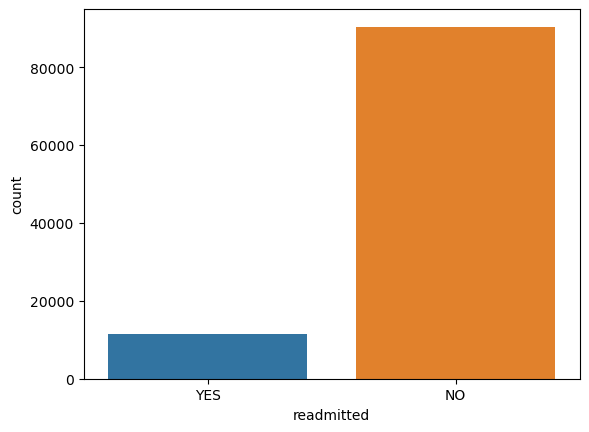

In [27]:
sns.countplot(x='readmitted', data=Y)
pass

Очевидно, что классы несбалансированы. В дальнейшем стоит попытаться устранить эту несбалансированность.

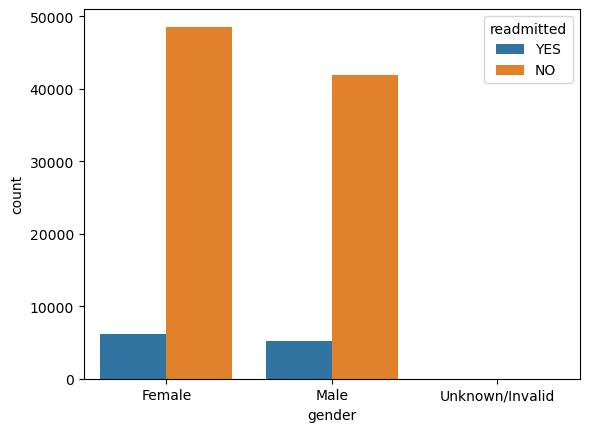

In [28]:
sns.countplot(x='gender', order=Y['gender'].value_counts().index, hue='readmitted', data=Y)
pass

В датасете преобладают женщины, кроме того, присутствуют невалидные значения, которые следует удалить для лучшей обработки данных.

In [29]:
rows_with_invalid_gender = Y[Y['gender'] == 'Unknown/Invalid']  # строки с невалидными значениями признака gender

len(rows_with_invalid_gender)  # число таких строк

3

Количество таких значений незначительно, поэтому их можно без проблем удалить (удалить соответствующие строки из таблицы).

In [30]:
Y.drop(rows_with_invalid_gender.index, axis=0, inplace=True)  # удаляем из таблицы

len(Y[Y['gender'] == 'Unknown/Invalid'])  # число строк с невалидными значениями признака gender после удаления

0

Посмотрим на возраст повторно госпитализируемых

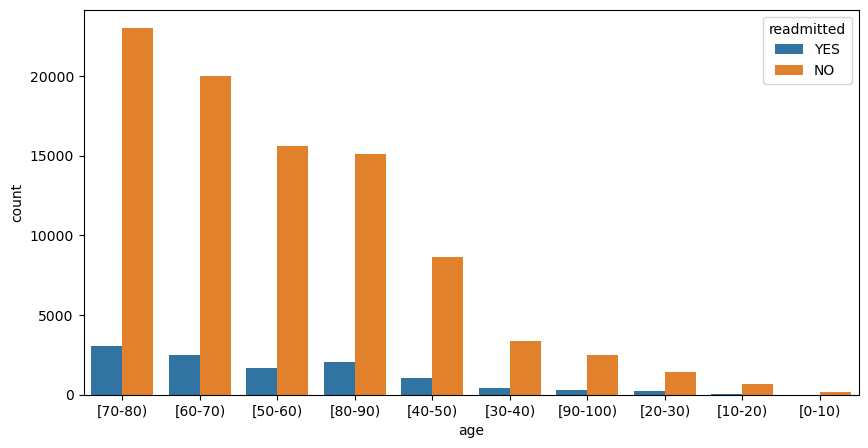

In [31]:
plt.figure(figsize=(10, 5))
sns.countplot(x='age', order=Y['age'].value_counts().index, hue='readmitted', data=Y)
pass

Наблюдается высокая частота посещений пожилыми пациентами, как среди тех, кто повторно госпитализировался, так и среди тех, кто не был повторно госпитализирован. Из этого возникает интересный вопрос о том, как именно оплачиваются медицинские услуги. Учитывая возрастное распределение среди пациентов, можно предположить, что большинство из них оплачивали медицинские услуги через страховку ([Medicare](https://en.wikipedia.org/wiki/Medicare_(United_States)))

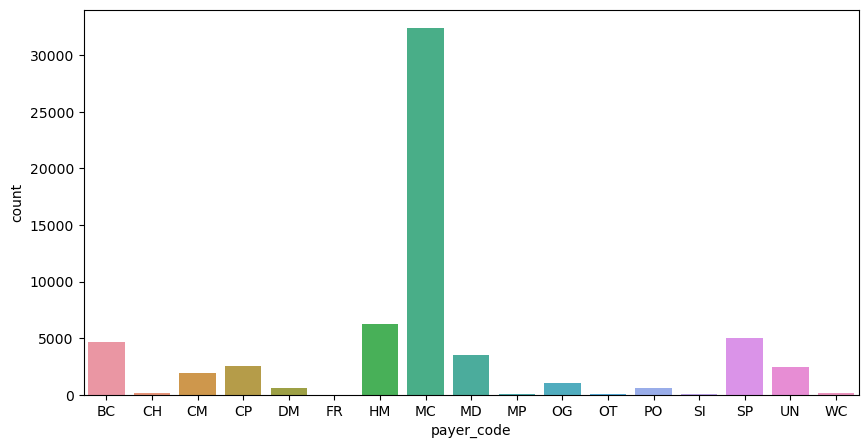

In [32]:
plt.figure(figsize=(10, 5))
sns.countplot(x='payer_code', data=Y)
pass

Да, MC (медицинская страховка для лиц от 65 лет и старше) - наиболее распространенный способ оплаты медицинских услуг.


Рассмотрим тип обращений

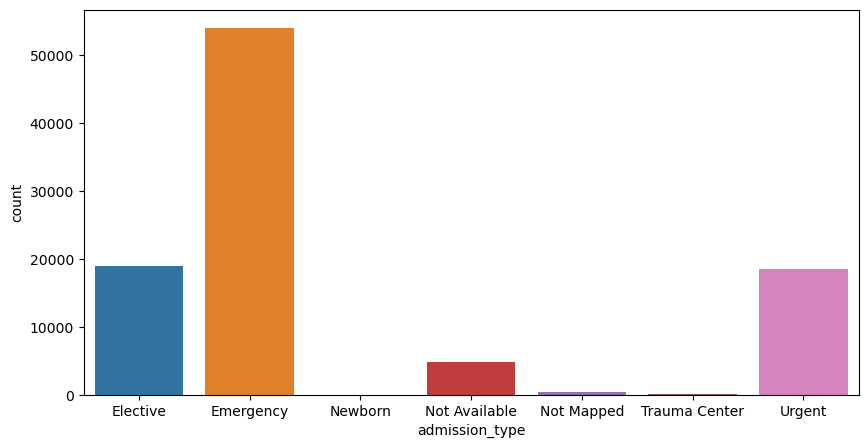

In [33]:
plt.figure(figsize=(10, 5))
sns.countplot(x='admission_type', data=Y)
pass

Большинство обращений было неотложными

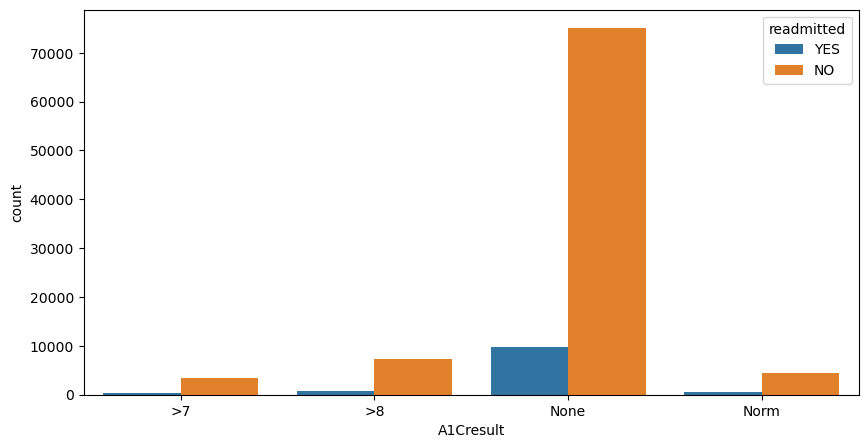

In [34]:
plt.figure(figsize=(10, 5))
sns.countplot(x='A1Cresult', hue='readmitted', data=Y)
pass

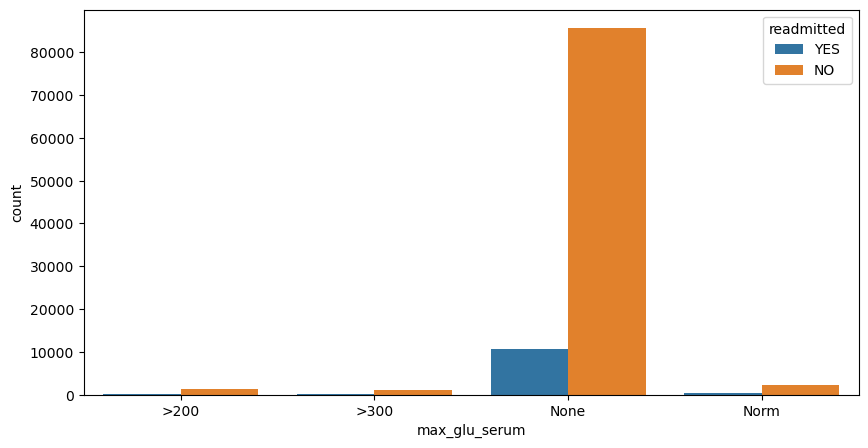

In [35]:
plt.figure(figsize=(10, 5))
sns.countplot(x='max_glu_serum', hue='readmitted', data=Y)
pass

Большинству пациентов не проводили тест на уровень гемоглобина (A1C) и глюкозу.

Построим графики зависимостей каждого количественного признака с каждым

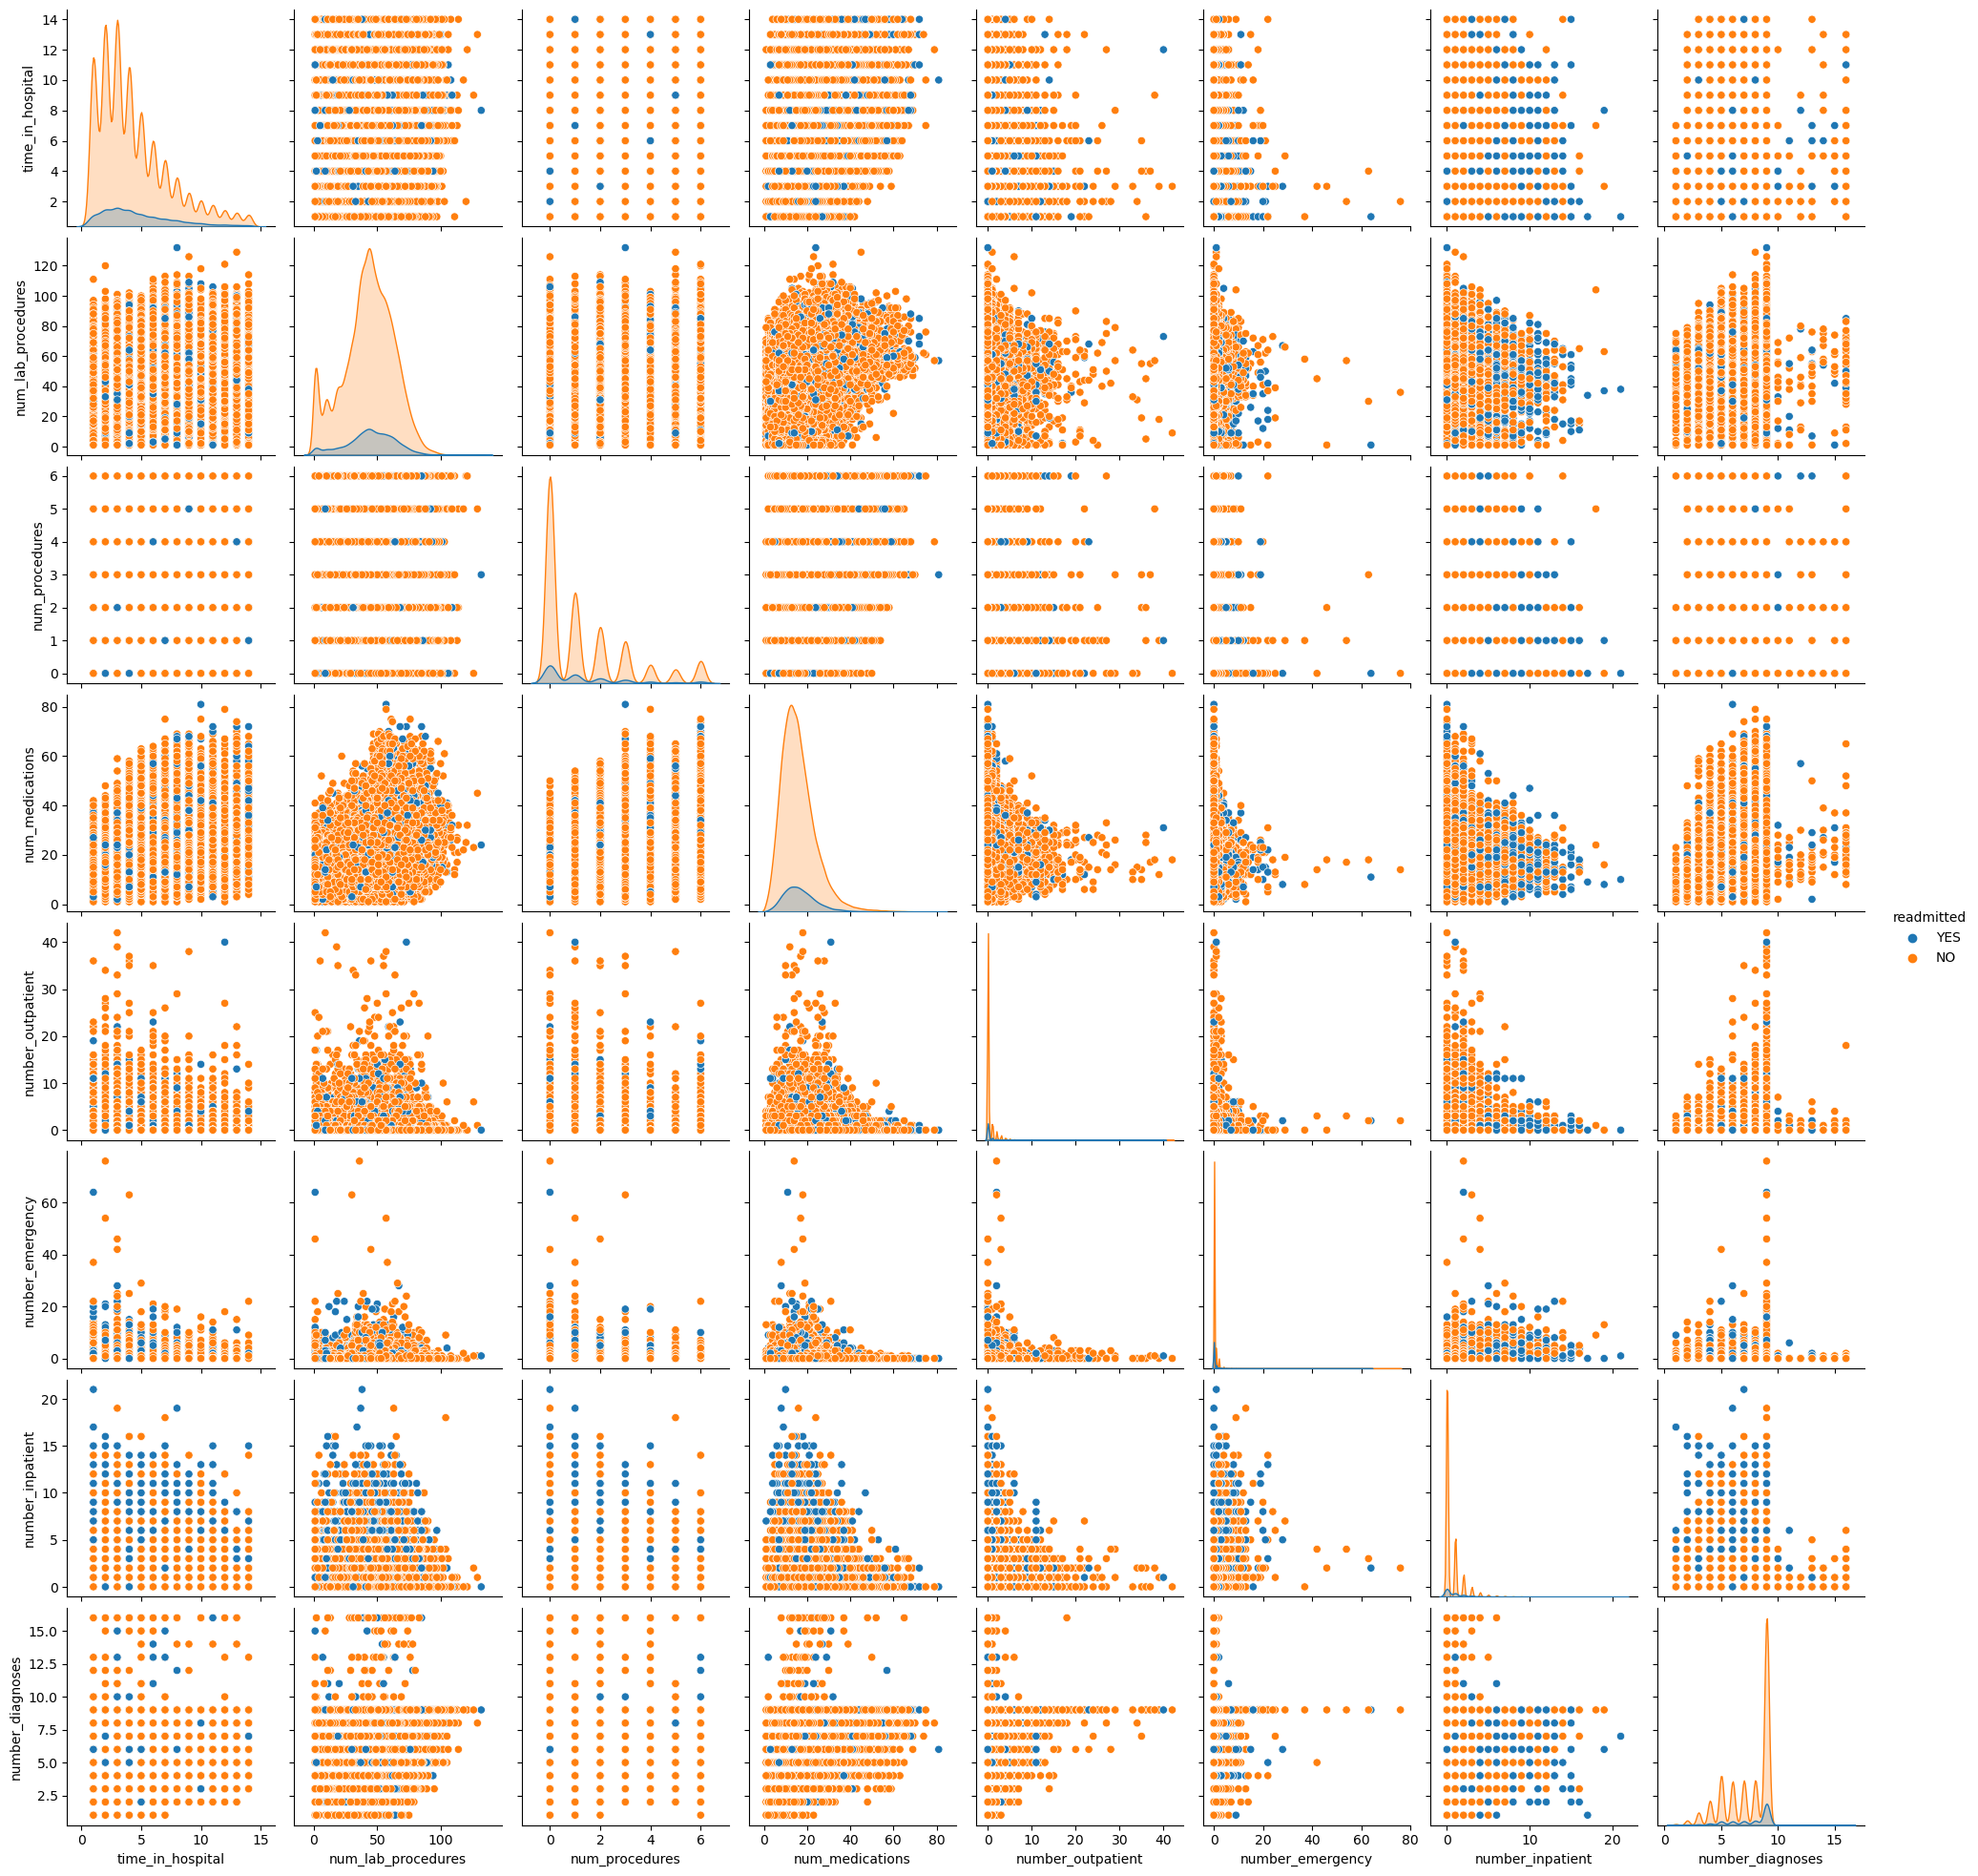

In [36]:
sns.pairplot(Y, hue='readmitted')

создадим матрицу корреляции для числовых характеристик и представим ее визуально

C:\Users\Falirchik\AppData\Local\Temp\ipykernel_1728\4019387502.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = Y.corr()


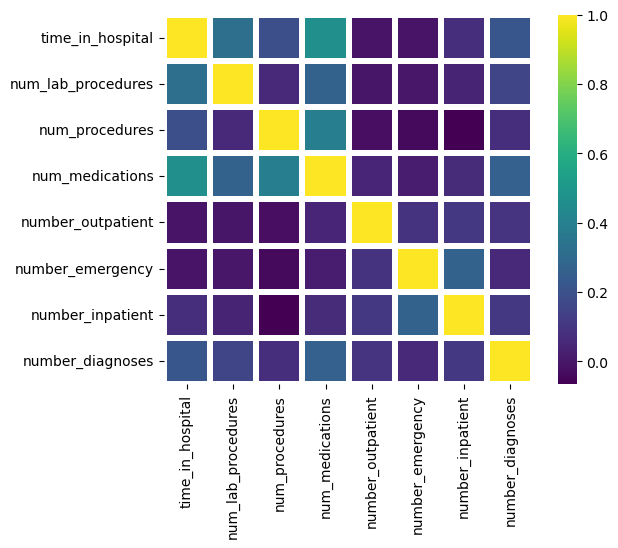

In [37]:
corr_mat = Y.corr()

sns.heatmap(corr_mat, cmap= 'viridis', linewidths=3, linecolor='white', square=True)
pass

Среди количественных признаков сильно скореллированных не оказалось.

Продолжим с вычислением матрицы корреляции для всех признаков, применяя временную факторизацию категориальных признаков.

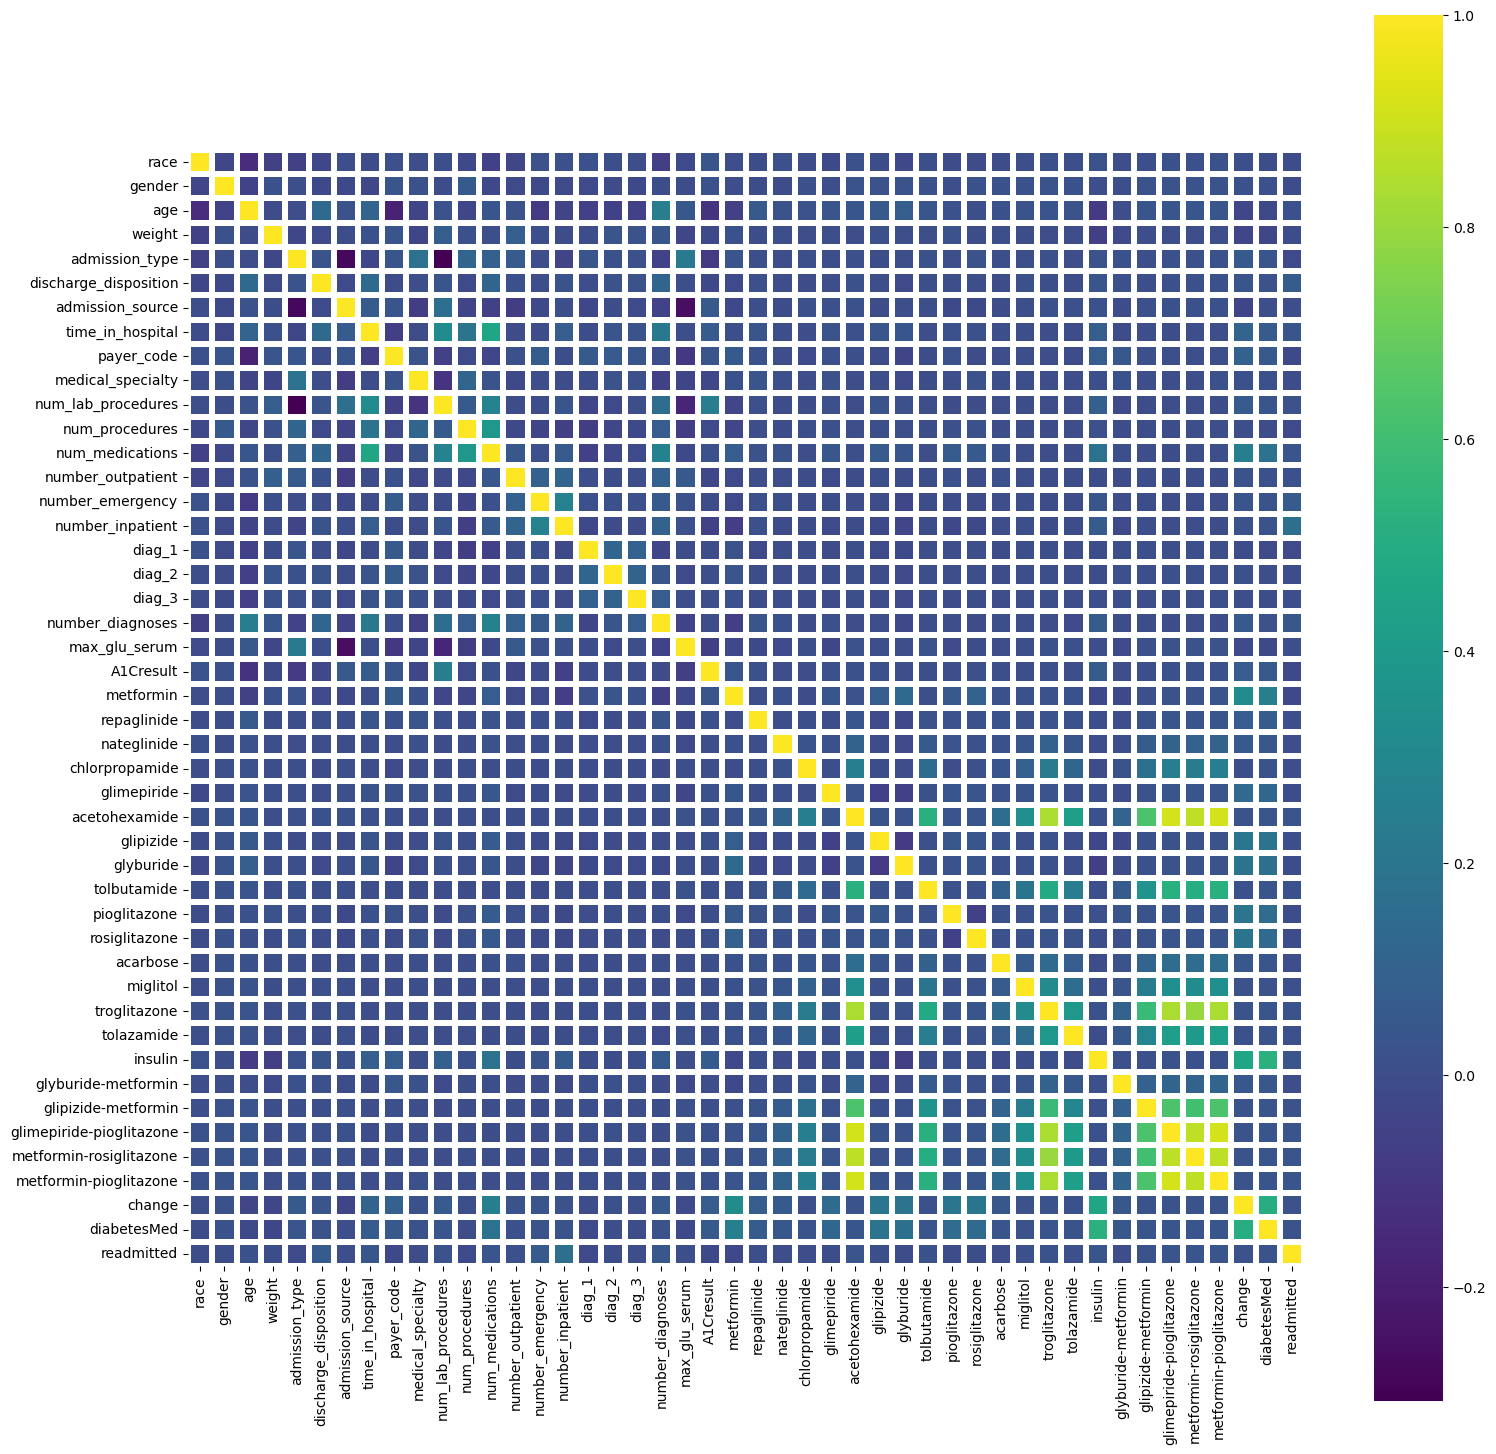

In [38]:
Y_f = Y.copy()
for column in Y_f.select_dtypes(['category']):
    Y_f[column] = pd.factorize(Y_f[column])[0]

corr_mat_f = Y_f.corr()

plt.figure(figsize=(18, 18))
sns.heatmap(corr_mat_f, cmap= 'viridis', linewidths=3, linecolor='white', square=True)
pass

Среди всех признаков сильно скореллированных тоже нет.
Выведем пары признаков, у которых коэффициенты корреляции превышают заданное значение.

In [40]:
corr_mat_f.where(np.triu(corr_mat_f > 0.4, k=1)).stack().sort_values(ascending=False)

acetohexamide             glimepiride-pioglitazone    0.909084
glimepiride-pioglitazone  metformin-pioglitazone      0.909084
acetohexamide             metformin-pioglitazone      0.909084
glimepiride-pioglitazone  metformin-rosiglitazone     0.870381
acetohexamide             metformin-rosiglitazone     0.870381
metformin-rosiglitazone   metformin-pioglitazone      0.870381
acetohexamide             troglitazone                0.836236
troglitazone              glimepiride-pioglitazone    0.836236
                          metformin-pioglitazone      0.836236
                          metformin-rosiglitazone     0.800633
glipizide-metformin       glimepiride-pioglitazone    0.628735
acetohexamide             glipizide-metformin         0.628735
glipizide-metformin       metformin-pioglitazone      0.628735
                          metformin-rosiglitazone     0.601960
troglitazone              glipizide-metformin         0.578339
insulin                   diabetesMed                 0

Хотя у признаков нет сильной связи, можно сказать, что существует средняя взаимосвязь между insulin, change и diabetesMed. Это обусловлено тем, что инсулин обычно назначается как лекарство для лечения диабета. Также можно наблюдать связь между time_in_hospital и num_medications. Чем дольше пациент находится в больнице (по разным причинам, оставаясь при этом пациентом), тем больше лекарств ему требуется для выздоровления. Так же существует взимосвязь между num_procedures  (количество процедур) и num_medications (количество препаратов).